In [1]:
import pandas as pd
import numpy as np
import disarray
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter


from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

In [2]:
df = pd.read_csv("term-deposit-marketing-2020.csv")

In [3]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign   y  
0  unknown    5   may       261         1  no  
1  unknown    5   may       151         1  no  
2  unknown    5   may        76         1  no  
3  unknown    5   may        92         1  no  
4  unknown    5   may       198         1  no

# Data Description

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

Output (desired target):

y - has the client subscribed to a term deposit? (binary)

In [4]:
#shape of dataset

df.shape

(40000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [6]:
df.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
y            False
dtype: bool

In [7]:
df.describe()

age        balance           day      duration      campaign
count  40000.000000   40000.000000  40000.000000  40000.000000  40000.000000
mean      40.544600    1274.277550     16.017225    254.824300      2.882175
std        9.641776    2903.769716      8.278127    259.366498      3.239051
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      54.000000      8.000000    100.000000      1.000000
50%       39.000000     407.000000     17.000000    175.000000      2.000000
75%       48.000000    1319.000000     21.000000    313.000000      3.000000
max       95.000000  102127.000000     31.000000   4918.000000     63.000000

In [8]:
#percentage of No or Yes in the data

(df['y'].value_counts()/df.shape[0])*100

no     92.76
yes     7.24
Name: y, dtype: float64

In [9]:
df.loc[(df['y'] == 'no')].describe()

age        balance           day      duration      campaign
count  37104.000000   37104.000000  37104.000000  37104.000000  37104.000000
mean      40.599208    1249.752533     16.032072    221.408042      2.918688
std        9.525450    2900.722436      8.255850    206.360022      3.298031
min       19.000000   -8019.000000      1.000000      0.000000      1.000000
25%       33.000000      50.000000      8.000000     95.000000      1.000000
50%       39.000000     395.000000     17.000000    164.000000      2.000000
75%       48.000000    1286.000000     21.000000    280.000000      3.000000
max       94.000000  102127.000000     31.000000   4918.000000     63.000000

In [10]:
df.loc[(df['y'] == 'yes')].describe()

age       balance          day     duration     campaign
count  2896.000000   2896.000000  2896.000000  2896.000000  2896.000000
mean     39.844959   1588.495856    15.827003   682.958564     2.414365
std      11.001984   2924.894429     8.557604   431.287174     2.306015
min      19.000000  -3058.000000     1.000000     8.000000     1.000000
25%      31.000000    141.000000     8.000000   364.000000     1.000000
50%      37.000000    620.000000    16.000000   629.000000     2.000000
75%      47.000000   1820.500000    22.000000   913.000000     3.000000
max      95.000000  45248.000000    31.000000  3881.000000    32.000000

<AxesSubplot:>

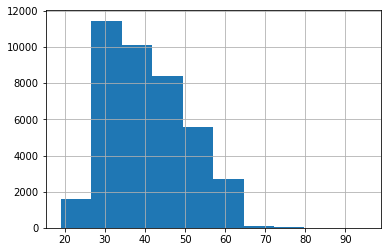

In [11]:
df.age.hist()

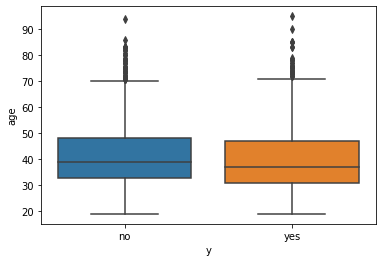

In [12]:
sns.boxplot(x="y",y="age",data=df)
plt.show()

<AxesSubplot:>

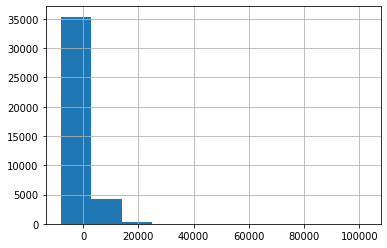

In [13]:
df.balance.hist()

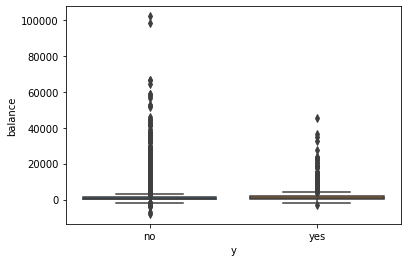

In [14]:
sns.boxplot(x="y",y="balance",data=df)
plt.show()

<AxesSubplot:>

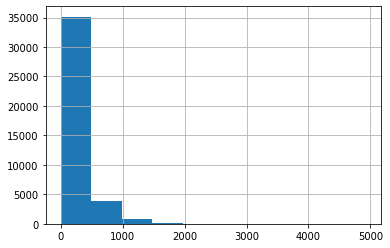

In [15]:
df.duration.hist()

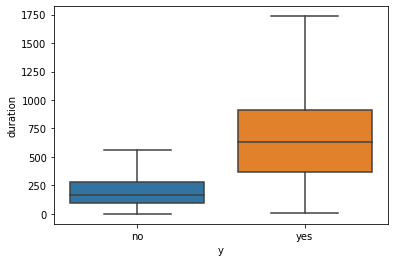

In [16]:
sns.boxplot(x='y', y='duration', data=df, showfliers=False)
plt.show()

In [17]:
my_tab = pd.crosstab(index=df['job'],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0          count
job                 
admin           4483
blue-collar     9383
entrepreneur    1405
housemaid       1087
management      8166
retired         1437
self-employed   1414
services        3910
student          524
technician      6852
unemployed      1104
unknown          235

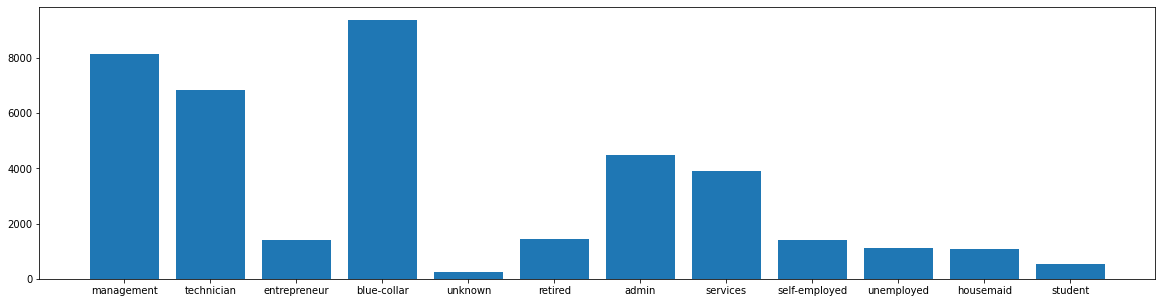

In [18]:
counter = Counter(df['job'])

plt.figure(figsize=(20,5))
plt.bar(counter.keys(), counter.values())
plt.show()

In [19]:
my_tab = pd.crosstab(index=df['marital'],  # Make a crosstab
                              columns="count")      # Name the count column

my_tab

col_0     count
marital        
divorced   4725
married   24386
single    10889

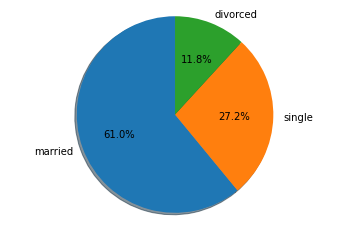

In [20]:
counter = Counter(df['marital'])

fig1, ax1 = plt.subplots()
ax1.pie(counter.values(), labels=counter.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [21]:
pd.crosstab(index=df['education'],  # Make a crosstab
                              columns="count")

col_0      count
education       
primary     6270
secondary  20993
tertiary   11206
unknown     1531

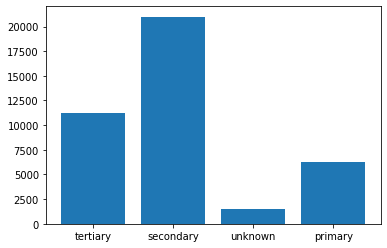

In [22]:
counter = Counter(df['education'])

plt.figure(figsize=(6,4))
plt.bar(counter.keys(), counter.values())
plt.show()

In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [24]:
pd.crosstab(index=df['default'],  # Make a crosstab
                              columns="count")

col_0    count
default       
no       39191
yes        809

In [25]:
pd.crosstab(index=df['housing'],  # Make a crosstab
                              columns="count")

col_0    count
housing       
no       15969
yes      24031

In [26]:
pd.crosstab(index=df['loan'],  # Make a crosstab
                              columns="count")

col_0  count
loan        
no     33070
yes     6930

In [27]:
pd.crosstab(index=df['contact'],  # Make a crosstab
                              columns="count")

col_0      count
contact         
cellular   24914
telephone   2321
unknown    12765

In [28]:
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
39995   53    technician   married   tertiary      no      395      no   no   
39996   30    management    single   tertiary      no     3340      no   no   
39997   54         admin  divorced  secondary      no      200      no   no   
39998   34    management   married   tertiary      no     1047      no   no   
39999   38    technician   married  secondary      no     1442     yes   no   

        contact  day month  duration  campaign    y  
0       unknown    5   may       261         1   no  
1       unknown    5   may       151         1   no  
2       unknown    5   may        76         1   no  
3       unknown    5   may        92         1   no  
4       unknown    5   may       198         1   no  
...         ...  ...   ...       ...       ...  ...  
39995  cellular    3   jun       107         1   no  
39996  cellular    3   jun       238         3  yes  
39997  cellular    3   jun       170         1  yes  
39998  cellular    3   jun       342         1   no  
39999  cellular    3   jun       113         1   no  

[40000 rows x 14 columns]

In [29]:
contact_y = pd.crosstab(df['contact'], df['y'])
contact_y

y             no   yes
contact               
cellular   22681  2233
telephone   2155   166
unknown    12268   497

In [30]:
pd.crosstab(df['marital'], df['y'], normalize="index")*100


y                no       yes
marital                      
divorced  91.724868  8.275132
married   93.939145  6.060855
single    90.568464  9.431536

In [31]:
marital_edu = pd.crosstab(df['marital'], df['education'] )
marital_edu

education  primary  secondary  tertiary  unknown
marital                                         
divorced       652       2614      1317      142
married       4836      12560      5999      991
single         782       5819      3890      398

In [32]:
job_y = pd.crosstab(index=df['job'],  # Make a crosstab
                              columns=df['y'])

job_y

y                no  yes
job                     
admin          4132  351
blue-collar    8848  535
entrepreneur   1317   88
housemaid      1034   53
management     7490  676
retired        1286  151
self-employed  1302  112
services       3672  238
student         442   82
technician     6355  497
unemployed     1008   96
unknown         218   17

In [33]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [34]:
df = df.drop(columns=["day","month"])

In [35]:
cat_columns = ['default', 'housing', 'loan']

for name in cat_columns:
    df[name].replace(to_replace={'yes':1, 'no':0}, inplace=True)

In [36]:
df.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  duration  campaign   y  
0  unknown       261         1  no  
1  unknown       151         1  no  
2  unknown        76         1  no  
3  unknown        92         1  no  
4  unknown       198         1  no

In [37]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [38]:
s = (X.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['job', 'marital', 'education', 'contact']


In [39]:
X_enc = pd.get_dummies(X, columns = object_cols)

In [40]:
X_enc

age  default  balance  housing  loan  duration  campaign  job_admin  \
0       58        0     2143        1     0       261         1          0   
1       44        0       29        1     0       151         1          0   
2       33        0        2        1     1        76         1          0   
3       47        0     1506        1     0        92         1          0   
4       33        0        1        0     0       198         1          0   
...    ...      ...      ...      ...   ...       ...       ...        ...   
39995   53        0      395        0     0       107         1          0   
39996   30        0     3340        0     0       238         3          0   
39997   54        0      200        0     0       170         1          1   
39998   34        0     1047        0     0       342         1          0   
39999   38        0     1442        1     0       113         1          0   

       job_blue-collar  job_entrepreneur  ...  marital_divorced  \
0                    0                 0  ...                 0   
1                    0                 0  ...                 0   
2                    0                 1  ...                 0   
3                    1                 0  ...                 0   
4                    0                 0  ...                 0   
...                ...               ...  ...               ...   
39995                0                 0  ...                 0   
39996                0                 0  ...                 0   
39997                0                 0  ...                 1   
39998                0                 0  ...                 0   
39999                0                 0  ...                 0   

       marital_married  marital_single  education_primary  \
0                    1               0                  0   
1                    0               1                  0   
2                    1               0                  0   
3                    1               0                  0   
4                    0               1                  0   
...                ...             ...                ...   
39995                1               0                  0   
39996                0               1                  0   
39997                0               0                  0   
39998                1               0                  0   
39999                1               0                  0   

       education_secondary  education_tertiary  education_unknown  \
0                        0                   1                  0   
1                        1                   0                  0   
2                        1                   0                  0   
3                        0                   0                  1   
4                        0                   0                  1   
...                    ...                 ...                ...   
39995                    0                   1                  0   
39996                    0                   1                  0   
39997                    1                   0                  0   
39998                    0                   1                  0   
39999                    1                   0                  0   

       contact_cellular  contact_telephone  contact_unknown  
0                     0                  0                1  
1                     0                  0                1  
2                     0                  0                1  
3                     0                  0                1  
4                     0                  0                1  
...                 ...                ...              ...  
39995                 1                  0                0  
39996                 1                  0                0  
39997                 1                  0                0  
39998                 1                  0                0  
39999                

In [41]:
y = y.values.reshape(-1,1)

In [42]:
le = LabelEncoder()
y_enc = le.fit_transform(y.ravel())

In [43]:
class_names = le.classes_
class_names

array(['no', 'yes'], dtype=object)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y_enc, test_size=0.2, random_state=42)

In [45]:
lgparams = {
            'n_estimators': [50,100,200,300],
            'learning_rate': [0.01, 0.1, 1],
            'num_leaves': [10, 20, 30, 40],
            'max_depth': [0,-1,1,2],
}

In [46]:
lgb_grid = GridSearchCV(LGBMClassifier(),lgparams,scoring="accuracy",cv=5,verbose=1)

In [47]:
lgb_grid.fit(X_train,y_train.ravel())

Fitting 5 folds for each of 192 candidates, totalling 960 fits


GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [0, -1, 1, 2],
                         'n_estimators': [50, 100, 200, 300],
                         'num_leaves': [10, 20, 30, 40]},
             scoring='accuracy', verbose=1)

In [49]:
threshold = 0.15
y_pred=(lgb_grid.predict_proba(X_test)[:, 1] > threshold).astype('float')
print(accuracy_score(y_test.ravel(),y_pred)*100)

89.05


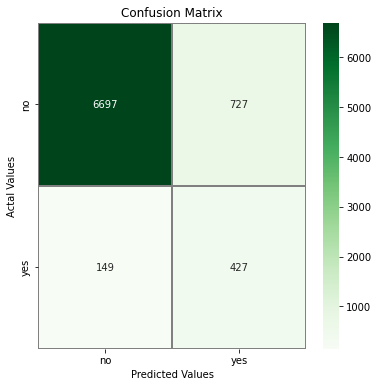

In [50]:
cm = confusion_matrix(y_test.ravel(),y_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = class_names, 
                     columns = class_names)

plt.figure(figsize=(6,6))
sns.heatmap(cm_df, annot=True,linewidths=0.01,cmap="Greens", linecolor="gray", fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [51]:
feature_names = list(lgb_grid.best_estimator_.feature_name_)
feature_importance =list(lgb_grid.best_estimator_.feature_importances_)
ft_importances_table = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
ft_importances_table =  ft_importances_table.sort_values(by='Importance', ascending=1, ignore_index=True,)
ft_importances_table

Feature  Importance
0          job_services           0
1           job_unknown           0
2        job_unemployed           0
3   education_secondary           0
4        marital_single           1
5      marital_divorced           1
6     job_self-employed           1
7           job_retired           1
8     education_unknown           1
9               default           1
10       job_technician           2
11     job_entrepreneur           2
12        job_housemaid           2
13       job_management           2
14    education_primary           2
15          job_student           2
16    contact_telephone           3
17     contact_cellular           3
18      job_blue-collar           7
19      marital_married          11
20            job_admin          12
21   education_tertiary          15
22                 loan          22
23              housing          24
24             campaign          33
25      contact_unknown          42
26              balance          47
27                  age          72
28             duration         141

<AxesSubplot:ylabel='Feature'>

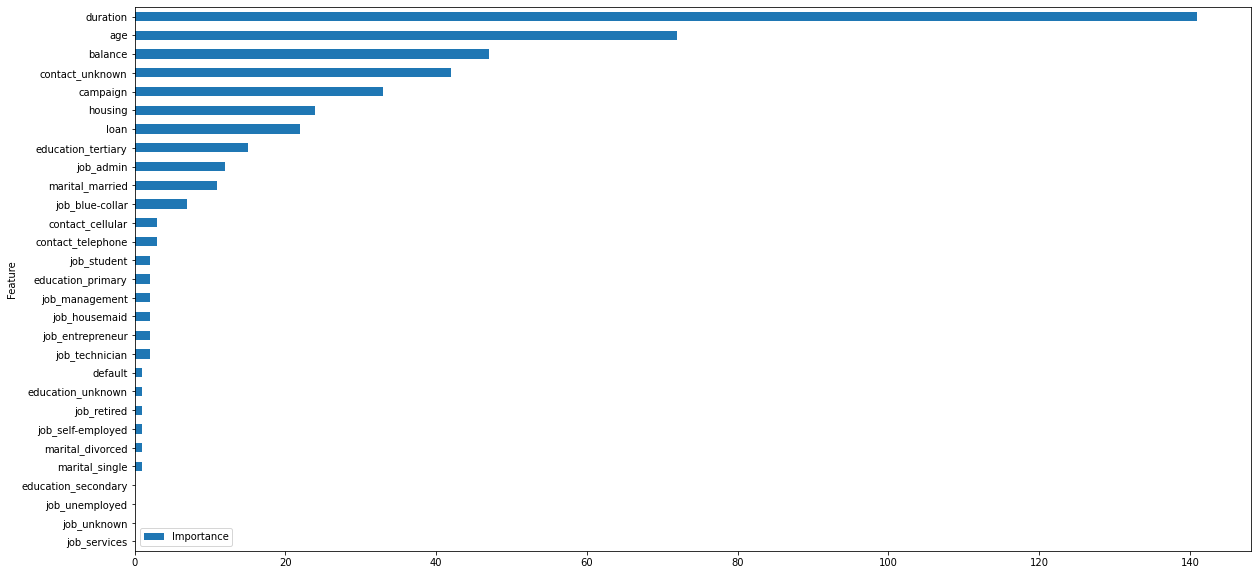

In [53]:
ft_importances_table.plot.barh(x='Feature', y='Importance', figsize = (20,10) )

In [54]:
print(classification_report(y_test.ravel(), y_pred))

              precision    recall  f1-score   support

           0       0.98      0.90      0.94      7424
           1       0.37      0.74      0.49       576

    accuracy                           0.89      8000
   macro avg       0.67      0.82      0.72      8000
weighted avg       0.93      0.89      0.91      8000



In [55]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

print("AUC")
print(roc_auc_score(y_test, y_pred))

AUC
0.8216968989463601


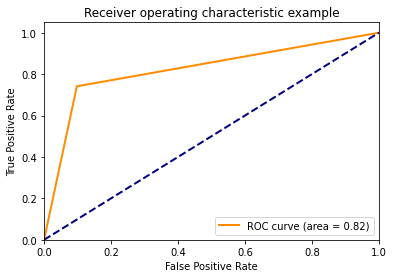

In [56]:
plt.figure()
lw = 2
plt.plot(
    fpr[1],
    tpr[1],
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % roc_auc[1],
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

In [57]:
# Precision

cm_df.da.precision

no     0.978235
yes    0.370017
dtype: float64

In [58]:
# Sensitivity

cm_df.da.sensitivity

no     0.902074
yes    0.741319
dtype: float64

In [59]:
# Specificity

cm_df.da.specificity

no     0.741319
yes    0.902074
dtype: float64

In [60]:
# Tp

cm_df.da.TP

no     6697
yes     427
dtype: int64

In [61]:
# Fp

cm_df.da.FP

no     149
yes    727
dtype: int64